# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depend on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

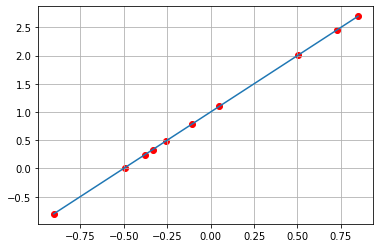

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
16/16 [==============================] - 0s 17ms/step - loss: 4.2302 - mse: 4.2302 - val_loss: 3.0181 - val_mse: 3.0181
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 3.2015 - mse: 3.2015 - val_loss: 2.3092 - val_mse: 2.3092
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 2.4710 - mse: 2.4710 - val_loss: 1.7977 - val_mse: 1.7977
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 1.9337 - mse: 1.9337 - val_loss: 1.4138 - val_mse: 1.4138
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 1.5247 - mse: 1.5247 - val_loss: 1.1238 - val_mse: 1.1238
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 1.2129 - mse: 1.2129 - val_loss: 0.8950 - val_mse: 0.8950
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.9660 - mse: 0.9660 - val_loss: 0.7152 - val_mse: 0.7152
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7714 - mse: 0.7

In [7]:
# return weights
model.get_weights()

[array([[1.9856203]], dtype=float32), array([0.9997682], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 1ms/step - loss: 5.9514e-05 - mse: 5.9514e-05

Test loss: 5.9514353779377416e-05
Test accuracy: 5.9514353779377416e-05


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 1ms/step - loss: 5.9514e-05 - mse: 5.9514e-05

Test loss: 5.9514353779377416e-05
Test accuracy: 5.9514353779377416e-05


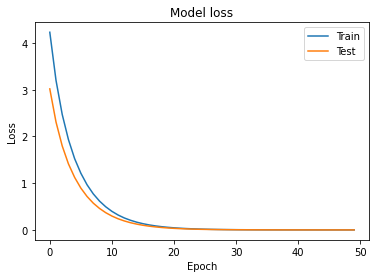

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

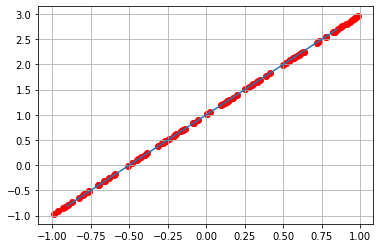

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Solution

If a gaussian noise with $\sigma=0.1$ is added to both the training and validation data, almost identical values for the two parameters (i.e. the weight and bias of the only neuron) are found: $w=1.97971, b=0.99005$. They also approximate quite well the linear function parameters $m=2$ and $q=1$. This interpretation of the NN parameters is due to the lack of an activation function (the identity is used), from which the output is: $output=input\times w +b$. The loss function evaluated on the validation data is though considerably higher than in the previous example ($0.01897$ instead of $5.9514\times10^{-5}$), clearly due to the noise increasing the square errors.

When increasing $N_{epochs}$ with fixed $N_{train}=500$, there is no further improvement in the loss function below $0.01881$.

    Epochs    Loss
    30        0.02193
    40        0.01914
    50        0.01897
    75        0.01882
    100       0.01881
    200       0.01881
    300       0.01881
    
However when increasing $N_{train}$ with $N_{epochs}=100$, one observes a decrease of the loss function up to $0.00701$, so the most convenient parameters are probably $N_{epochs}=100$, $N_{train}=1000$.

    Ntrain    Loss
    500       0.01897
    750       0.00797
    1000      0.00701
    1500      0.00920
    2000      0.01740
    3000      0.00973

The node parameters are in this case: $w=1.99504$, $b=1.00317$.

In [82]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

In [76]:
# compose the NN model

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [77]:
# train the model
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

model.get_weights()

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7141 - mse: 0.7141 - val_loss: 0.4095 - val_mse: 0.4095
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2528 - mse: 0.2528 - val_loss: 0.1761 - val_mse: 0.1761
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0573 - mse: 0.0573 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0158 - 

[array([[1.9950417]], dtype=float32), array([1.0031726], dtype=float32)]

1/1 [==============================] - 0s 2ms/step - loss: 0.0070 - mse: 0.0070

Test loss: 0.007009467575699091
Test accuracy: 0.007009467575699091


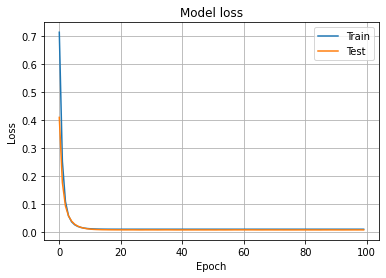

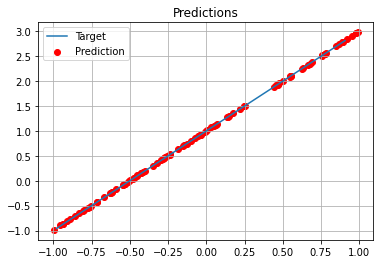

In [83]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

# Plot predictions
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Predictions')
plt.legend(['Target', 'Prediction'], loc='best')
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Solution

All tests have been run with:

$\sigma=0.05$, $N_{train}=5\times10^3$, $N_{epochs}=100$.

#### Activation function

Different activation functions have first been explored with the following NN:

- $2$ layers with $2$ and $1$ neurons
- optimizer: sgd
- loss function: mse

The activation functions used for the first layer are: **tanh**, **sigmoid**, **softsign** and **relu**, while no activation function was applied to the second layer. The results are shown in the picture below.

In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Function parameters
a = 4
b = -3
c = -2
d = 3

# Training, validation and target
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3

sigma = 0.05
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3, sigma)
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

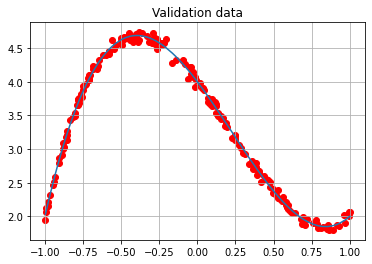

In [193]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation')
plt.title('Validation data')
plt.grid(True)
plt.show()

In [194]:
tot=4

x_predicted=np.ndarray((tot,500))
y_predicted=np.ndarray((tot,500,1))
loss=np.ndarray((tot))

In [210]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Create model
model2 = tf.keras.Sequential()
model2.add(Dense(2, input_shape=(1,), activation='relu'))
model2.add(Dense(1))

# Compile model
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model2.summary()

# Train model
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 0s 3ms/step - loss: 1.4375 - mse: 1.4375 - val_loss: 0.4983 - val_mse: 0.4983
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4371 - mse: 0.4371 - val_loss: 0.4354 - val_mse: 0.4354
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 0.3676 - mse: 0.3676 - val_loss: 0.3631 - val_mse: 0.3631
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 0.2955 - mse: 0.2955 - val_loss: 0.2957 - val_m

7/7 [==============================] - 0s 3ms/step - loss: 0.0430 - mse: 0.0430

Test loss: 0.043035030364990234
Test accuracy: 0.043035030364990234


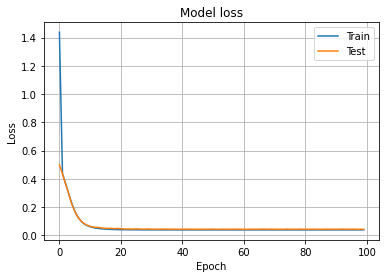

In [211]:
# Evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

In [212]:
#Save the predictions of this module (change j from 0 to tot-1 to save new ones)
j=3
x_predicted[j] = np.random.uniform(-1, 1, 500)
y_predicted[j] = model2.predict(x_predicted[j])
loss[j]=score[0]

# j=0: 2-1 tanh sgd mse
# j=1: 2-1 sigmoid sgd mse
# j=2: 2-1 softsign sgd mse
# j=3: 2-1 relu sgd mse

Loss
tanh : 0.007413012441247702
sigmoid : 0.2911834418773651
softsign : 0.037042032927274704
relu : 0.043035030364990234


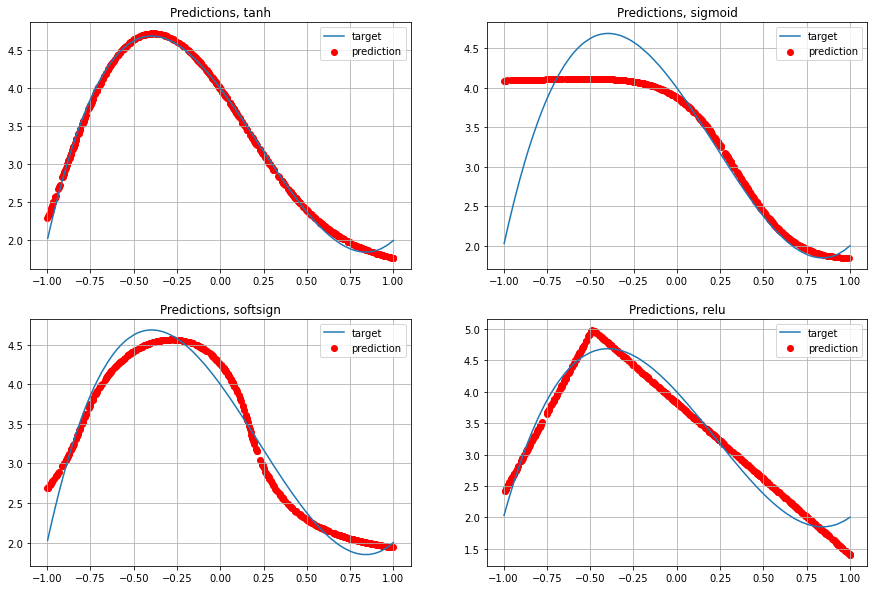

In [223]:
activ=['tanh', 'sigmoid', 'softsign', 'relu']

lines=int((tot+1)/2)
fig, ax = plt.subplots(lines, 2, figsize=(15, 5*lines))

print('Loss')

for i in range(tot):
    k=int(i/2)
    print(activ[i], ':', loss[i])
    ax[k,i%2].scatter(x_predicted[i], y_predicted[i], color='r', label='prediction') # loss='+str(loss[i])
    ax[k,i%2].set_title('Predictions, '+activ[i])
    ax[k,i%2].plot(x_valid, y_target, label='target')
    ax[k,i%2].legend(loc='best')
    ax[k,i%2].grid(True)
plt.show()

The **tanh** turned out to be the best choice, as its predictions on newly generated points fit the polynomial way better than all the other functions. Its loss function evaluated on the validation data is also the lowest. From now on the **tanh** is then used as activation function on the first layer.

#### Optimizer and loss functions

Different optimizers and loss function have then been tested on how well they fit the polynomial inside and also outside of the interval $[-1,1]$, in which the model was trained.

Optimizers: **sgd**, **adagrad**, **adam**, **RMSprop**.

Loss functions: **mse**, **mae**.

The loss function has been evaluated on the validation data inside the interval and on new points outside of it. Predictions have also been made outside of the interval to see if the polynomial curve is correctly fitted. The results are summarized in the picture below.

In [241]:
x_outside=np.random.uniform(-1.5, 1.5, 500)
x_outside.sort()
y_outside = np.random.normal(a + b * x_outside + c * x_outside**2 + d * x_outside**3, sigma)

y_target = a + b * x_outside + c * x_outside**2 + d * x_outside**3

Loss
sgd , mse . Inside:  0.007169825024902821 . Outside:  1.9374154806137085
sgd , mae . Inside:  0.04678613692522049 . Outside:  0.6091417074203491
adagrad , mse . Inside:  9.772579193115234 . Outside:  8.40001392364502
adagrad , mae . Inside:  2.480170488357544 . Outside:  2.4541375637054443
adam , mse . Inside:  0.007934905588626862 . Outside:  1.7924669981002808
adam , mae . Inside:  0.06787802278995514 . Outside:  0.7079042792320251
RMSprop , mse . Inside:  0.007430446334183216 . Outside:  1.726483941078186
RMSprop , mae . Inside:  0.06656239181756973 . Outside:  0.705865740776062


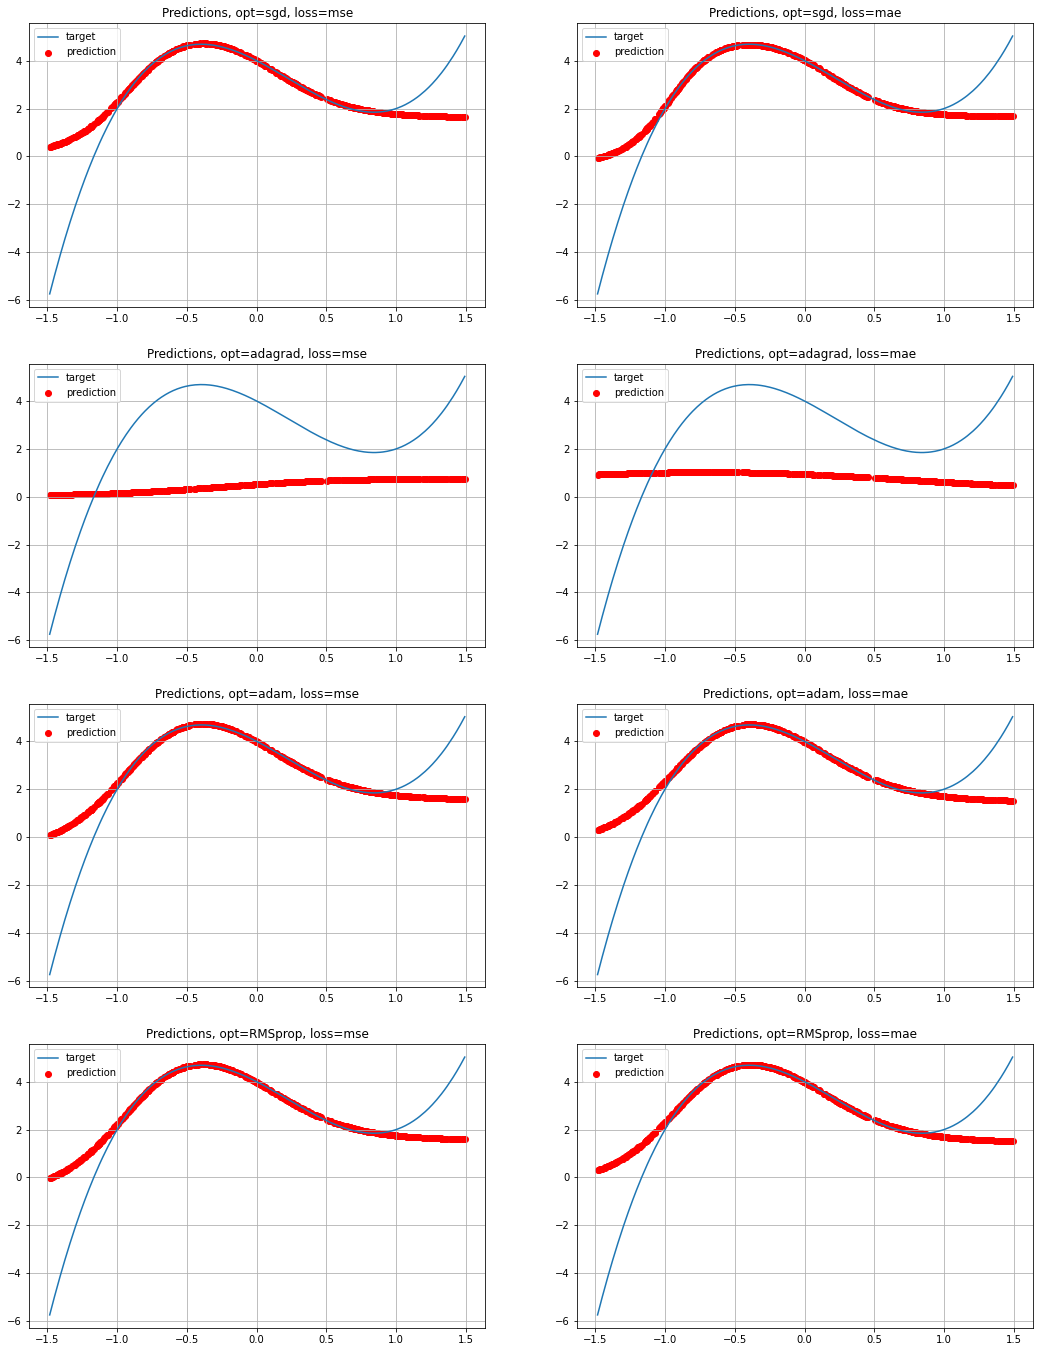

In [242]:
optimizers=['sgd', 'adagrad', 'adam', 'RMSprop']
lossfuncs=['mse', 'mae']

lines=len(optimizers)
columns=len(lossfuncs)

print('Loss')

fig, ax = plt.subplots(lines, columns, figsize=(9*columns, 6*lines))
for i in range(lines):
    for j in range(columns):

        # Create model
        model3 = tf.keras.Sequential()
        model3.add(Dense(2, input_shape=(1,), activation='tanh'))
        model3.add(Dense(1))

        # Compile model
        model3.compile(optimizer=optimizers[i], loss=lossfuncs[j])

        # Train model
        model3.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=100,
                  shuffle=True,
                  verbose=0,
                  validation_data=(x_valid, y_valid))

        # Evaluate model
        score1 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
        score2 = model3.evaluate(x_outside, y_outside, batch_size=32, verbose=0)
        print(optimizers[i], ",", lossfuncs[j], ". Inside: ", score1, ". Outside: ", score2)
        
        y_pred = model3.predict(x_outside)
        ax[i,j].scatter(x_outside, y_pred, color='r', label='prediction')
        ax[i,j].set_title('Predictions, opt='+optimizers[i]+', loss='+lossfuncs[j])
        ax[i,j].plot(x_outside, y_target, label='target')
        ax[i,j].legend(loc='best')
        ax[i,j].grid(True)
        
plt.show()

No difference can be noticed between the fits after training the NN with the **mse** and the **mae** loss functions. Using the second one the loss is obviously closer to $1$ because of the squares in **mse**.

While the **adagrad** completely fails to give any good prediction (the loss is high too), all the other tested optimizers, **sgd**, **adam** and **RMSprop**, are able to fit the polynomial very well, but only within the training interval $[-1,1]$. Indeed their loss is quite low inside the interval, but rather high outside of it.

#### Layers

Having chosen the optimizer **sgd** and the loss function **mse**, further test have been run varying the number and the size of the layers.

In [251]:
x_outside=np.random.uniform(-1.5, 1.5, 500)
x_outside.sort()
y_outside = np.random.normal(a + b * x_outside + c * x_outside**2 + d * x_outside**3, sigma)

y_target = a + b * x_outside + c * x_outside**2 + d * x_outside**3

In [296]:
# Create model
model4 = tf.keras.Sequential()
model4.add(Dense(2, input_shape=(1,), activation='tanh'))
model4.add(Dense(1))

# Compile model
model4.compile(optimizer='sgd', loss='mse')

# Train model
model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          verbose=0,
          validation_data=(x_valid, y_valid))

print("Model trained")

Model trained


Test loss: 0.006792076863348484


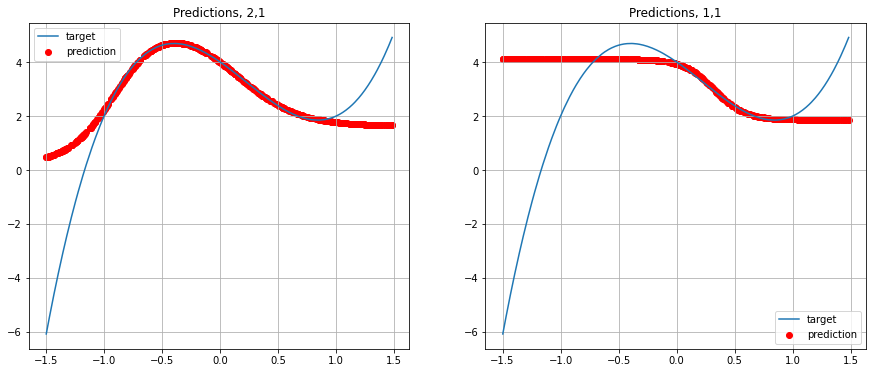

In [297]:
# Evaluate model
score = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

print('Test loss:', score)

fig, ax = plt.subplots(1, 2, figsize=(15,6))
y_pred = model4.predict(x_outside)

ax[0].scatter(x_outside, y_pred, color='r', label='prediction')
ax[0].set_title('Predictions, 2,1')
ax[0].plot(x_outside, y_target, label='target')
ax[0].legend(loc='best')
ax[0].grid(True)

ax[1].scatter(x_outside, y_pred_1, color='r', label='prediction') # y_pred_1 = 1,1
ax[1].set_title('Predictions, 1,1')
ax[1].plot(x_outside, y_target, label='target')
ax[1].legend(loc='best')
ax[1].grid(True)

plt.show()

    Layers shape   Loss
    1,1            0.29570
    2,1            0.00679
    4,1            0.00901
    50,1           0.00928
    2,2,1          0.00795
    4,4,1          0.00870
    2,2,2,1        0.00769
    
Any NN larger than the one composed of two layers with $2$ and $1$ neurons just seems to fit the polynomial as well as in the left picture. No improvement in the loss function is observed either when increasing the number of layers or their size. A NN with only two layers and $1$ neuron per layer instead gives worse results, as shown in the right picture, so at least $2$ neurons are necessary in the first layer, but adding too many parameters to the network does not lead to any improvement in the loss or in the goodness of the fit in this case.

All layers but the first have no activation function here, as adding a **tanh** activation function to the second layer gives similar results to the right picture, while using other activation functions such as the **relu** or the **softsign** does not give anything better than the left picture.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### Solution

To fit a 2D function the first layer of the NN needs to have *input_shape=$2$*. A larger first layer is necessary to accomplish this task (here $50$ neurons are used) rather than a higher number of layers. The second layer is made of a single neuron collecting all the outputs from the previous one with no activation function. The **sgd** and the **mse** were chosen for the optimizer and the loss function as they give fairly good results.

The NN has been trained on $5\times10^3$ training points and $2\times10^2$ validation points in the 2D plan, all perturbed with a gaussian noise of width $\sigma=0.05$. A higher number of epochs ($200$) than in the previous 1D cases is also necessary.

In [299]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, (5000, 2))
x_valid = np.random.uniform(-1.5, 1.5, (200, 2))
x_valid.sort()

x_train2=[x for x in x_train]
x_valid2=[x for x in x_valid]

sigma = 0.05
y_target = np.sin(np.sin(x_valid[:,0]**2+x_valid[:,1]**2))
y_train = np.random.normal(np.sin(x_train[:,0]**2+x_train[:,1]**2), sigma)
y_valid = np.random.normal(np.sin(x_valid[:,0]**2+x_valid[:,1]**2), sigma)

In [354]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model5 = tf.keras.Sequential()
model5.add(Dense(50, input_shape=(2,), activation='relu'))
model5.add(Dense(1))

model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model5.summary()

history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=200,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 50)                150       
_________________________________________________________________
dense_242 (Dense)            (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1817 - mse: 0.1817 - val_loss: 0.1440 - val_mse: 0.1440
Epoch 2/200
157/157 [==============================] - 0s 3ms/step - loss: 0.1483 - mse: 0.1483 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 3/200
157/157 [==============================] - 1s 5ms/step - loss: 0.1415 - mse: 0.1415 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 4/200
157/157 [==============================] - 1s 3ms/step - loss: 0.1367 - mse: 0.1367 - val_loss: 0.1254 - 

157/157 [==============================] - 0s 2ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 119/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 120/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 121/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 122/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 123/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 124/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 125/200
157/157 [==============================] - 0s 2ms/step 

Epoch 179/200
157/157 [==============================] - 0s 3ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 180/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 181/200
157/157 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 182/200
157/157 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 183/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 184/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 185/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 186/200
157/157 [==============================] 

7/7 [==============================] - 0s 3ms/step - loss: 0.0105 - mse: 0.0105

Test loss: 0.010490762069821358
Test accuracy: 0.010490762069821358


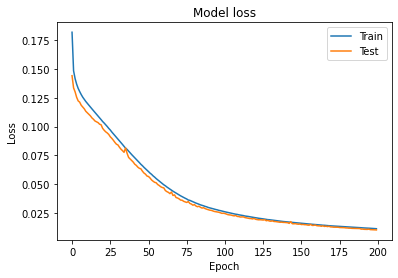

In [355]:
score = model5.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

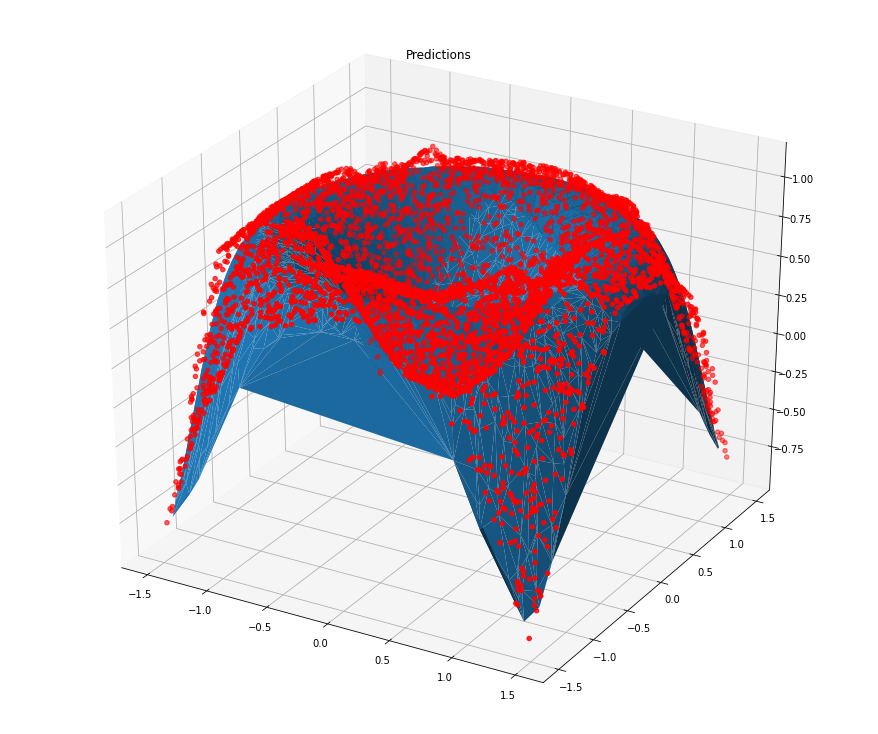

In [356]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
x_predicted = np.random.uniform(-1.5, 1.5, (5000, 2))
y_predicted = model5.predict(x_predicted)
x_right = np.random.uniform(-1.5, 1.5, (2000, 2))
y_right = np.sin(np.sin(x_right[:,0]**2+x_right[:,1]**2))
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color='r')
ax.plot_trisurf(x_right[:,0], x_right[:,1], y_right)
plt.title('Predictions')
plt.grid(True)
plt.show()

3 parameters were changed to find the best solution: the activation function, the layer size and the number of epochs.

For fitting this 2D function **relu** turned out to be the best activation function for the first layer compared to **tanh**, **sigmoid**, **softsign**, **softmax** and **elu**, as well as the only one to produce a good fit.

Attempts with only $10$ neurons with the **relu** function return a similar loss, but a much sharper fit surface, which does not represent the target surface very well. The more neurons are used (up to $50$) the smoother the surface becomes.

From the loss-vs-epochs curve one can see that the model keeps getting better when epochs are increased up to $200$.
Indeed when trained on $100$ epochs the model does not perform a good fit, while using $200$ or more epochs the target function is fitted almost perfectly.

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

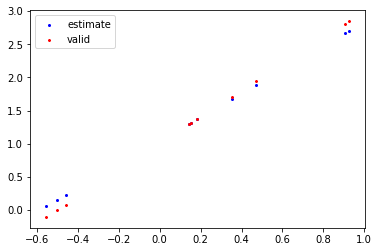

10/10 [==============================] - 0s 21ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0117 - val_mean_squared_error: 0.0117


[array([[1.7890505]], dtype=float32), array([1.0447811], dtype=float32)]

In [15]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()